In [110]:
#The sns.set_style sets the aesthetics of the plot 
#%config InlineBackend figure_format = ‘retina’  makes the plot higher resolution. 
#%matplotlib inline is a magic function that tells Matplotlib to generate our plots within the frontend 
import pandas as pan
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

In [111]:
# reading a file
data = pan.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [112]:
# describing the details present in the file
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [113]:
data.shape

(10683, 11)

In [114]:
#dropping duplicates fron the file
data = data.drop_duplicates(keep = 'first')
print(data.shape)

(10463, 11)


In [115]:
#displaying the datatypes in the file
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [116]:
#1.Finding cheapest airline by price
cheap_air = data.sort_values(by = 'Price',ascending = 'True').head()
cheap_air

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
1513,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840


In [117]:
#2.Finding cheapest airline by source, destination and price
cheap_sor_des = data.sort_values(by = ['Source' ,'Destination','Price'], ascending = 'True')
cheap_sor_des

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
96,SpiceJet,15/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
2159,SpiceJet,12/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
4399,SpiceJet,24/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
5423,SpiceJet,6/06/2019,Banglore,Delhi,BLR → DEL,21:10,00:05 07 Jun,2h 55m,non-stop,No check-in baggage included,3257
5741,SpiceJet,27/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
...,...,...,...,...,...,...,...,...,...,...,...
8990,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM → VNS → DEL → HYD,06:30,16:35,10h 5m,2 stops,No info,23528
5738,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,08:15,16:35,8h 20m,2 stops,No info,23843
1424,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → DED → DEL → HYD,14:20,16:50 07 Mar,26h 30m,2 stops,No info,24115
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210


In [118]:
#3.Finding the specified airlines
data.loc[data['Airline'] == 'Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
18,Air India,12/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10670,Air India,12/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10671,Air India,6/06/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145


In [119]:
#4.Listing the specified condition
data.loc[(data.Price >= 5000) & (data.Airline == 'IndiGo')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
26,IndiGo,1/06/2019,Delhi,Cochin,DEL → LKO → COK,21:50,03:35 02 Jun,5h 45m,1 stop,No info,8238
35,IndiGo,27/06/2019,Delhi,Cochin,DEL → BOM → COK,10:35,21:00,10h 25m,1 stop,No info,5894
63,IndiGo,15/05/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 16 May,10h 30m,1 stop,No info,7191
...,...,...,...,...,...,...,...,...,...,...,...
10605,IndiGo,21/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info,6144
10607,IndiGo,21/03/2019,Delhi,Cochin,DEL → BOM → COK,09:10,01:35 22 Mar,16h 25m,1 stop,No info,8765
10619,IndiGo,27/04/2019,Delhi,Cochin,DEL → LKO → COK,21:50,03:35 28 Apr,5h 45m,1 stop,No info,6307
10631,IndiGo,15/05/2019,Delhi,Cochin,DEL → BLR → COK,02:00,07:45,5h 45m,1 stop,No info,6037


In [120]:
#checking the co-variance of the columns
data.corr()

,Price
Price,1.0


In [121]:
#displaying unique values in the list
print(data.nunique())

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64


In [122]:
#5.converting to data and time format
data['Dep_Time']=pan.to_datetime(data['Dep_Time'])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2020-08-20 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-20 05:50:00,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-20 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2020-08-20 18:05:00,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2020-08-20 16:50:00,21:35,4h 45m,1 stop,No info,13302


In [123]:
data['Arrival_Time']=pan.to_datetime(data['Arrival_Time'])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2020-08-20 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-20 05:50:00,2020-08-20 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-20 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2020-08-20 18:05:00,2020-08-20 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2020-08-20 16:50:00,2020-08-20 21:35:00,4h 45m,1 stop,No info,13302


In [124]:
#6.converting into hour nad minute format
data['Dep_hr']=data['Dep_Time'].dt.hour
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hr
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2020-08-20 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,22
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-20 05:50:00,2020-08-20 13:15:00,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-20 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2020-08-20 18:05:00,2020-08-20 23:30:00,5h 25m,1 stop,No info,6218,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2020-08-20 16:50:00,2020-08-20 21:35:00,4h 45m,1 stop,No info,13302,16


In [125]:
data['Dep_min']=data['Dep_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hr,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2020-08-20 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-20 05:50:00,2020-08-20 13:15:00,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-20 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2020-08-20 18:05:00,2020-08-20 23:30:00,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2020-08-20 16:50:00,2020-08-20 21:35:00,4h 45m,1 stop,No info,13302,16,50


In [126]:
data['Arrival_hr']=data['Arrival_Time'].dt.hour
data['Arrival_min']=data['Arrival_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2020-08-20 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-20 05:50:00,2020-08-20 13:15:00,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-20 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2020-08-20 18:05:00,2020-08-20 23:30:00,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2020-08-20 16:50:00,2020-08-20 21:35:00,4h 45m,1 stop,No info,13302,16,50,21,35


In [127]:
#droping the dep_time and Arrival_Time
drop=['Dep_Time','Arrival_Time']
data.drop(drop,inplace=True,axis=1)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35


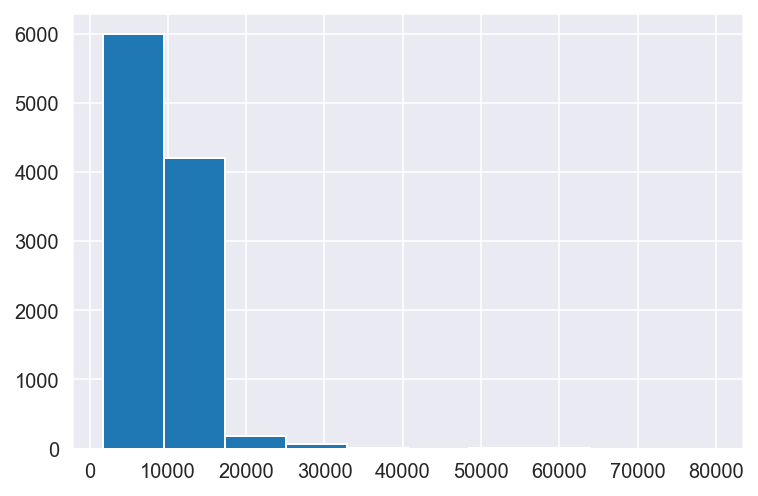

In [128]:
#data visualization
#plotting in histogram
data["Price"].hist()
plt.show()

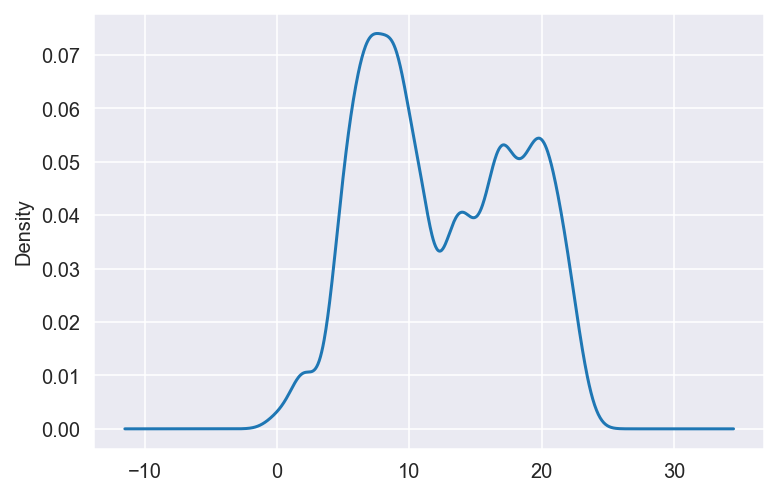

In [129]:
#plotting in kernal density chart
data["Dep_hr"].plot.kde()
plt.show()

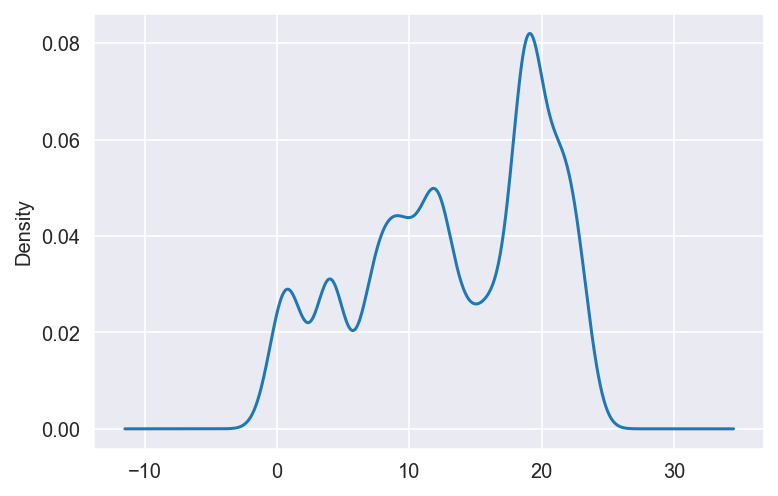

In [130]:
data["Arrival_hr"].plot.kde()
plt.show()

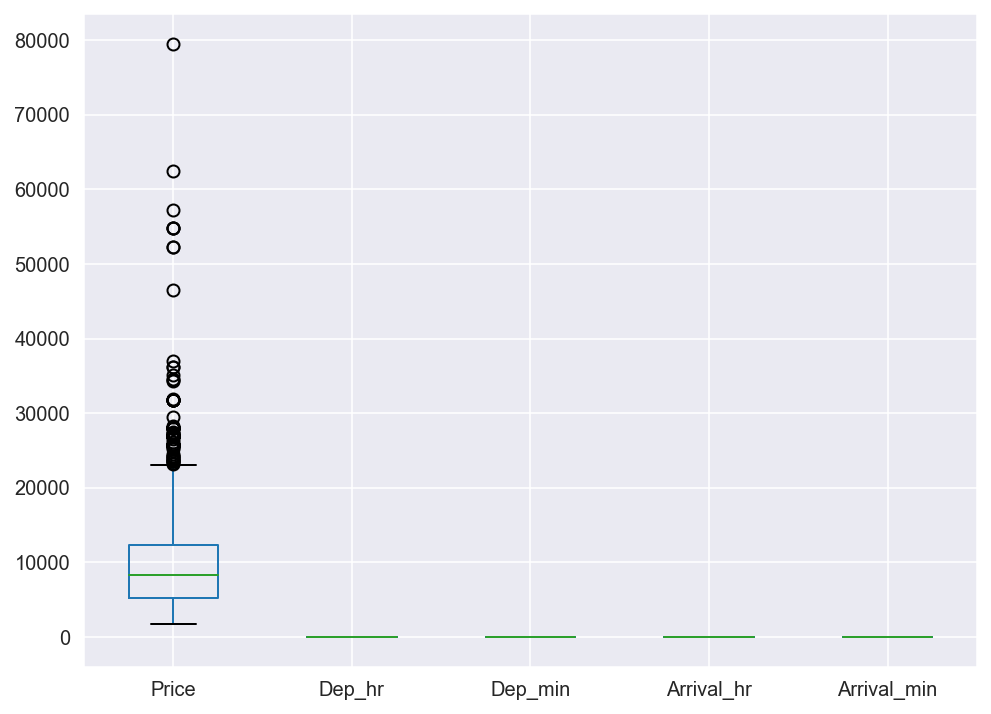

In [131]:
#plotting in box plot
data.plot.box(figsize=(8,6))
plt.show()

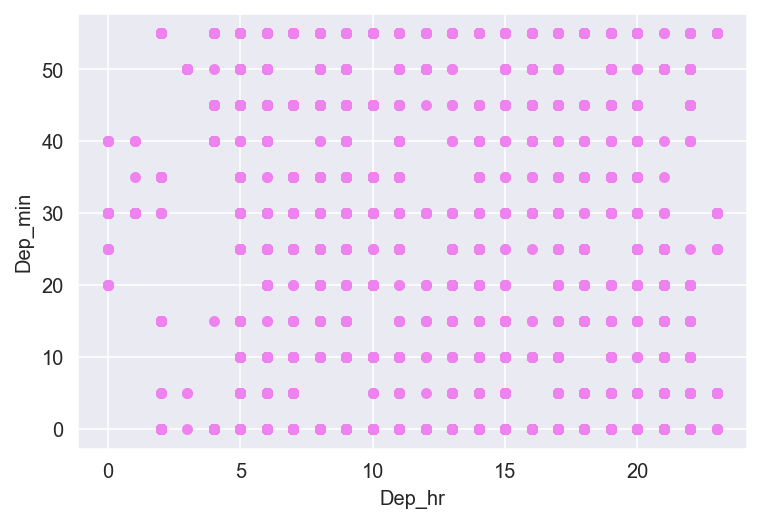

In [132]:
data.plot(kind='scatter',x='Dep_hr',y='Dep_min',color='violet')
plt.show()

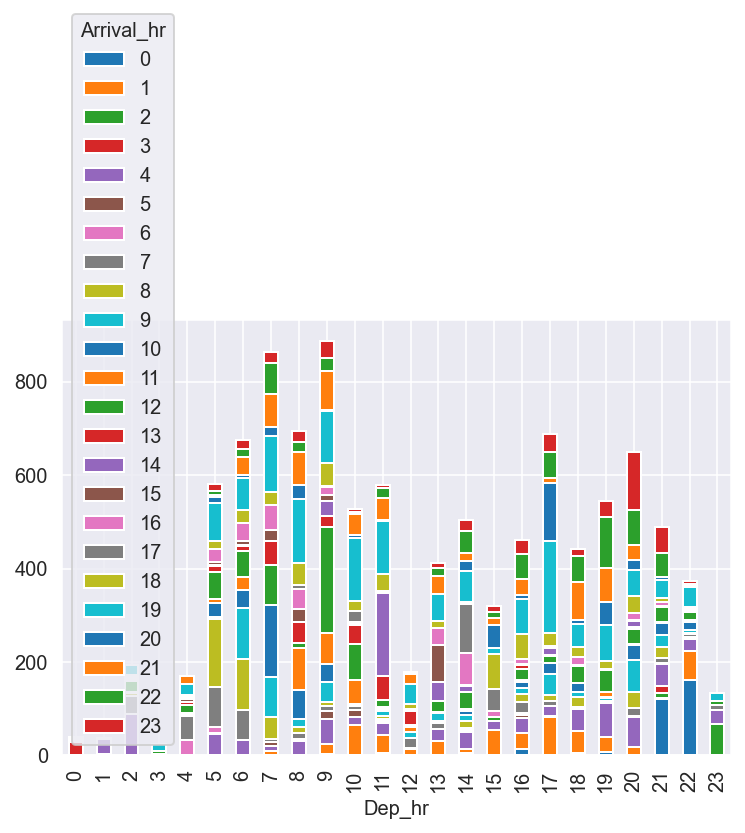

In [133]:
#stacked bar chart with teo-level group by
data.groupby(['Dep_hr','Arrival_hr']).size().unstack().plot(kind='bar',stacked=True)
plt.show()